In [4]:
import sys
!{sys.executable} -m pip install schemdraw

La transferencia I2/I1 es:


0.142857142857143*(s**2 + 1)/(0.428571428571429*s**2 + 1.0)

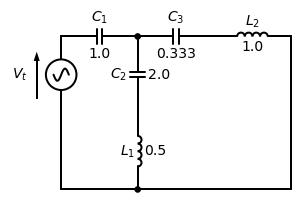

In [11]:
import schemdraw as schem
import schemdraw.elements as e
import sympy as sp

def paralelo(a, b):
    return (a*b)/(a+b)

s = sp.symbols('s', complex=True)

Y11 = (3*s*(s**2 + (7/3)))/((s**2 + 2)*(s**2 + 5))

C1 = sp.simplify(sp.expand(s/Y11)).subs(s**2, -1)

Z2 = sp.factor(sp.simplify(sp.expand((1/Y11) - (1/(C1*s)))))

K1 = sp.simplify(sp.expand(((s**2 + 1)/(s*Z2)))).subs(s**2, -1)

Y4 = sp.factor(sp.simplify(sp.expand((1/Z2) - ((K1*s)/(s**2 + 1)))))

C3 = sp.simplify(sp.expand(s/Y4)).subs(s**2, 0)

Z6 = sp.factor(sp.simplify(sp.expand((1/Y4) - (C3/s))))

L2 = sp.limit(sp.expand(Z6/s), s**2, sp.oo)

Ta = sp.Matrix([[1, 1/(s*C1)],[0, 1]])
Tb = sp.Matrix([[1, 0],[paralelo(s*K1, 1/((1/K1)*s)), 1]])
Tc = sp.Matrix([[1, 1/(s*(1/C3)) + (s*L2)],[0, 1]])

TT = Ta * Tb * Tc

verif = sp.factor(sp.simplify(sp.expand(1/TT[1,1]))) #I2/I1

print('La transferencia I2/I1 es:')
display(verif)

d = schem.Drawing(unit=2.5)
C1 = d.add(e.CAP, d='right', label='$C_1$', botlabel=f'{float(C1)}')
d.add(e.DOT)
d.push()
C2 = d.add(e.CAP, d='down', label='$C_2$', botlabel=f'{float(K1)}')
L1 = d.add(e.INDUCTOR, d='down', label='$L_1$', botlabel=f'{float(1/K1)}')
d.pop()
C3 = d.add(e.CAP, d='right', label='$C_3$', botlabel=f'{round(float(1/C3),3)}')
L2 = d.add(e.INDUCTOR, d='right', label='$L_2$', botlabel=f'{float(L2)}')
d.add(e.LINE, d='down', l=5)
d.add(e.LINE, d='left', tox=L1.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=C1.start)
d.add(e.LINE, d='up')
Vt = d.add(e.SourceSin(), xy=C1.start, toy=L1.end, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()